In [1]:
import os
import json
import numpy as np
import matplotlib.pyplot as pl

In [2]:
def load_json_files():
	# load all json files in directory and return as list of json objects
	json_objects = []
	path = 'experiment'
	for f in os.listdir(path):
		json_objects.append(json.load(open(path + '/' + f)))
	return json_objects


In [3]:
def filter_illusion(json_objects, illusion_name = 'Popple Illusion'):
	# filter by illusion name, and sort by variation
	results = [[] for i in range(10)] # length = number of variations
	for obj in json_objects:
		for data_point in obj:
			#print(data_point['illusionName'])
			if data_point['illusionName'] == illusion_name:
				results[data_point['variationID']].append(data_point)
	return results

In [7]:
def plot_results(results):
	hist = False
	if hist:
		for i in range(10):
			slider_vals = [data_point['distortion'] for data_point in results[i]]
			print('variation {}: μ={:.2f}, σ={:.2f}'.format(i+1, np.mean(slider_vals), np.std(slider_vals)))
			pl.subplot(10,1,i+1)
			pl.hist(slider_vals, bins=np.linspace(0, 1, 200))
	else:
		nx = 200
		xs = np.linspace(0, 1, nx)
		bins = 50
		gauss_width = 1 / 2*bins
		for i in range(10):
			slider_vals = [data_point['distortion'] for data_point in results[i]]
			slider_vals_large = np.tile(np.matrix(slider_vals).T, (1, nx))
			xs_large = np.tile(xs, (len(slider_vals), 1))
			gauss_pts = np.zeros((len(slider_vals), nx))
			gauss_pts = np.exp(-np.square(slider_vals_large - xs_large) / (2*gauss_width**2))
			gauss_plot = np.sum(np.array(gauss_pts), axis=0)
			print('variation {}: μ={:.2f}, σ={:.2f}'.format(i+1, np.mean(slider_vals), np.std(slider_vals)))
			pl.subplot(10,1,i+1)
			pl.plot(xs, gauss_plot/sum(gauss_plot)*nx)
			# pl.subplot(10,1,i+1)
			pl.hist(slider_vals, bins=bins)

	pl.show()

In [167]:
def plot_corr(results):
    x = [40,40,72,72,56,56,88,88,104,104]
    y_vals_tot =[];
    for i in range(10):
        y_vals = [data_point['inverted'] for data_point in results[i]]
        y_vals_tot.append(y_vals)
        print('variation {}: μ={:.2f}, σ={:.2f}'.format(i+1, np.mean(y_vals), np.std(y_vals)))
        #pl.hist(y_vals, bins=np.linspace(0, 1, 200))
    y_vals_new = [];
    y_vals_new.append(np.concatenate((y_vals_tot[0],y_vals_tot[1]),axis=None));
    y_vals_new.append(np.concatenate((y_vals_tot[4],y_vals_tot[5]),axis=None));
    y_vals_new.append(np.concatenate((y_vals_tot[2],y_vals_tot[3]),axis=None));
    y_vals_new.append(np.concatenate((y_vals_tot[6],y_vals_tot[7]),axis=None));
    y_vals_new.append(np.concatenate((y_vals_tot[8],y_vals_tot[9]),axis=None));
    for i in range(len(y_vals_new)):
        print('variation {}: μ={:.2f}, σ={:.2f}'.format(i+1, np.mean(y_vals_new[i]), np.std(y_vals_new[i])))
    x_pos = np.arange(len(y_vals_new))
    fig, ax = pl.subplots();
    ax.errorbar(x_pos, np.mean(y_vals_new,axis=1), yerr=np.std(y_vals_new,axis=1), fmt='.k', capsize=10)
    ax.set_xticks(x_pos)
    ax.set_xticklabels([40,56,72,88,104])
    #pl.savefig('patch_num_to_rating.eps',format='eps', dpi=900)
    pl.savefig('patch_num_to_rating.png',format='png', dpi=900)
    pl.show()

In [168]:
def main():
    json_objects = load_json_files()
    results = filter_illusion(json_objects)
    #print(results)
    plot_corr(results);
    #plot_results(results)

variation 1: μ=4.76, σ=0.63
variation 2: μ=4.43, σ=0.95
variation 3: μ=4.81, σ=0.46
variation 4: μ=4.68, σ=0.62
variation 5: μ=4.68, σ=0.74
variation 6: μ=4.76, σ=0.49
variation 7: μ=4.70, σ=0.65
variation 8: μ=4.65, σ=0.71
variation 9: μ=4.73, σ=0.50
variation 10: μ=4.70, σ=0.65
[array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 2, 5, 4, 5, 4, 5, 5, 4, 1, 5, 5, 5,
       5, 5, 4, 5, 4, 5, 3, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 3, 3, 5, 5,
       5, 5, 5, 2, 5, 5, 4, 4]), array([5, 5, 3, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3,
       5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 2, 5, 5, 4, 4, 5, 5, 4, 5, 5, 5, 5,
       5, 5, 4, 5, 5, 5, 5, 3, 5, 5, 4, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5,
       5, 5, 5, 4, 5, 5, 5, 4]), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5,
       5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 5, 5, 3, 4, 5, 5, 5,
       5, 4, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5

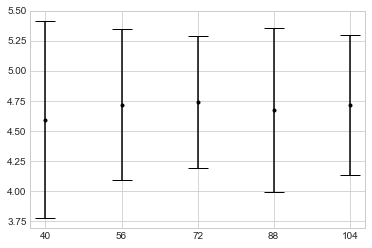

In [169]:
main()

In [16]:
color = [4,3,2,1]

In [132]:
np.linspace(4,5,5)

array([4.  , 4.25, 4.5 , 4.75, 5.  ])

In [44]:
test.append(54)

In [45]:
test

[54, 54, 54]

In [46]:
color = np.array(color)

In [47]:
color == 3

array([False,  True, False, False])

In [49]:
color[color ==3]

array([3])